In [ ]:
# packages
import pandas as pd
import numpy as np
import os

In [ ]:
Yelp = pd.read_csv("Data_Final")

([<matplotlib.axis.XTick at 0x7f62c0ce6190>,
 <a list of 5 Text major ticklabel objects>)

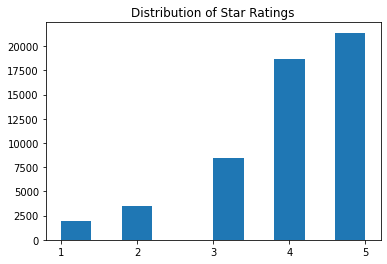

In [ ]:
# yelp score distribution
plt.hist("Star", data = Yelp)
plt.title("Distribution of Star Ratings")
plt.xticks(np.arange(1, 6, 1))

From the plot of the distribution of the star rating scores, we can see that the review scores are left skewed with the majority of the reviews scoring a 4 or 5.

In [ ]:
# create stopword list
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
stop_words = stopwords.words("english")
print(stop_words)

LookupError: ignored

In [ ]:
with open(r"C:\Users\Joyce\Downloads\Stats 101C\Yelp Challenge_Final\positive-words.txt", "r") as f:
    positive_words = [line.strip() for line in f]
with open(r"C:\Users\Joyce\Downloads\Stats 101C\Yelp Challenge_Final\negative-words.txt", "r") as f:
    negative_words = [line.strip() for line in f]

In [ ]:
# remove stop words from review text
def cleanData(df):
    # lower case all letters
    # remove stopwords
    # replace all punctuation with white space characters and then split string on whitespace characters
    # expand contractions
    # for double negatives -> if not is before a positive word = add one to negative score
    # if not is before a negative word = add one to the positive score
    # us afinn() package to score each word
    df["Review"] = df["Review"].str.lower()
    df["review_no_stopwords"] = df["Review"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    df["review_no_stopwords"] = df["review_no_stopwords"].str.replace(",", ", ").str.replace(".", ". ")
    df["review_no_stopwords"] = df["review_no_stopwords"].str.replace("[^\w\s]", "") # remove punctuation
    df["review_no_stopwords"] = df["review_no_stopwords"].str.split() # split by whitespace
    return(df)


In [ ]:
data_cleaned = cleanData(data_cleaned)
data_cleaned

<ipython-input-10-5a18986bad1e>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["review_no_stopwords"] = df["review_no_stopwords"].str.replace(",", ", ").str.replace(".", ". ")
<ipython-input-10-5a18986bad1e>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review_no_stopwords"] = df["review_no_stopwords"].str.replace("[^\w\s]", "") # remove punctuation


,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,review_no_stopwords
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"great burgers,fries and salad! burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,"[great, burgers, fries, salad, burgers, hint, ..."
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,we were a bit weary about trying the shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12,"[bit, weary, trying, shellfish, company, wharf..."
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,this was a tough one! on the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05,"[tough, one, merits, wine, fairly, average, un..."
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"i love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99,"[love, trying, fresh, seafood, piers, wharfs, ..."
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,i stopped in because i was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79,"[stopped, hungry, snacks, browsed, store, sinc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53840,53840,wuxZSSVXwKzN3NPcdSljUA,q0DRuEAxE5i57xNSTrDP4Q,3.0,2,0,2,so let me begin by stating that the owner of n...,CA,Isla Vista,3.5,227,360,153,133,"2014,2015,2016,2017,2018,2019,20,20,2021",11,3.41,"[let, begin, stating, owner, naan, stop, compl..."
53841,53841,ZDCWEctaQHfJQT1sH_rMmA,rZQqiElaeM7JO2rQAXHK2w,5.0,3,2,2,we've used jerry the plumber for water heater ...,CA,Santa Barbara,4.5,691,2353,427,1361,"2016,2017,2018,2019,20,20,2021",23,4.74,"[weve, used, jerry, plumber, water, heater, re..."
53842,53842,ZDCWEctaQHfJQT1sH_rMmA,EA4v61tJCHg8xhk7bqn8Yw,5.0,2,2,0,"wow, talk about some of the best deals i've ev...",CA,Santa Barbara,4.5,691,2353,427,1361,"2016,2017,2018,2019,20,20,2021",23,4.74,"[wow, talk, best, deals, ive, ever, seen, groc..."
53843,53843,SSlW0LTQwER5obHjTW0ZIg,3tvi-OJ_-iK1ecjzSaH-oA,5.0,4,3,2,my husband and i decided to stop into hook and...,CA,Santa Barbara,4.5,163,391,155,286,"2015,2016,2017,2018,2019,20,20,2021",20,4.36,"[husband, decided, stop, hook, press, minimoon..."


In [ ]:
total_count = pd.DataFrame(columns = ["positive_count", "negative_count", "total_count"])
data_cleaned.iloc[0:len(data_cleaned)]["review_no_stopwords"].apply(count_words)
print(total_count)

      positive_count negative_count total_count
0                  4              0          21
1                 19              4         176
2                 19              4         133
3                 25              8         208
4                 10              0          53
...              ...            ...         ...
53840             15              6         136
53841              8              2          72
53842              9              2         100
53843             10              5         128
53844              5              1          38

[53845 rows x 3 columns]


In [ ]:
# counts number of positive and negative words
def count_words(col):
    word_counts = pd.value_counts(np.array(col))
    pos_count = 0
    neg_count = 0
    count = 0
    i = 0
    for word in word_counts.index:
        if (word in positive_words):
            pos_count = pos_count + word_counts.values[i]

        elif (word in negative_words):
            neg_count = neg_count + word_counts.values[i]

        count = count + word_counts.values[i]
        i += 1
    global total_count
    total_count = total_count.append({"positive_count" : pos_count, "negative_count" : neg_count, "total_count" : count}, ignore_index = True)

In [ ]:
data_cleaned = pd.concat([data_cleaned, total_count], axis = 1)
data_cleaned["positive_ratio"] = data_cleaned.apply(lambda x: x["positive_count"]/(x["negative_count"] + x["positive_count"]) if (x["negative_count"] + x["positive_count"]) != 0 else 0, axis=1)
#data_cleaned["positive_ratio"] = data_cleaned["positive_ratio"].replace(np.inf, 0, inplace = True)
data_cleaned["negative_ratio"] = data_cleaned.apply(lambda x: x["negative_count"]/(x["negative_count"] + x["positive_count"]) if (x["negative_count"] + x["positive_count"]) != 0 else 0, axis=1)
#data_cleaned["negative_ratio"] = data_cleaned["negative_ratio"].replace(np.inf, 0, inplace = True)

In [ ]:
# make sure division by zero problem is fixed
data_cleaned[["positive_ratio", "negative_ratio"]]

,positive_ratio,negative_ratio
0,1.000000,0.000000
1,0.826087,0.173913
2,0.826087,0.173913
3,0.757576,0.242424
4,1.000000,0.000000
...,...,...
53840,0.714286,0.285714
53841,0.800000,0.200000
53842,0.818182,0.181818
53843,0.666667,0.333333


## Building Models

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pcs = pca.fit_transform(features)
pca.explained_variance_ratio_

array([0.54074111, 0.37867503, 0.04302737])

### Visualizing Data

In [ ]:
import seaborn as sns

C:\Users\Joyce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='positive_count', ylabel='negative_count'>

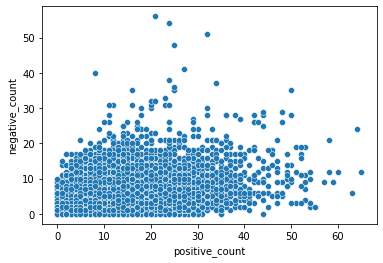

In [ ]:
sns.scatterplot(data_cleaned["positive_count"], data_cleaned["negative_count"])

### Splitting the Data

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# split data
#X = data_cleaned[["positive_count", "negative_count", "total_count", "positive_ratio", "negative_ratio"]]
X = data_cleaned[["positive_ratio", "negative_ratio"]]
y = data_cleaned["Star"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)
X_train

,positive_ratio,negative_ratio
21965,0.888889,0.111111
37338,0.600000,0.400000
28846,0.866667,0.133333
21235,0.750000,0.250000
44669,0.000000,1.000000
...,...,...
15377,1.000000,0.000000
17730,0.928571,0.071429
28030,0.666667,0.333333
15725,0.833333,0.166667


### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train, y_train)
KNN_y_pred = KNN_model.predict(X_test)

In [ ]:
# confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_y_pred)
KNN_cm

array([[  69,   86,  144,   39,   44],
       [  66,  135,  229,  174,  116],
       [  53,  216,  303,  556,  487],
       [  31,  271,  366, 1375, 1727],
       [  17,  213,  241, 1475, 2336]], dtype=int64)

[Text(0.5, 1.0, 'KNN Accuracy Heatmap')]

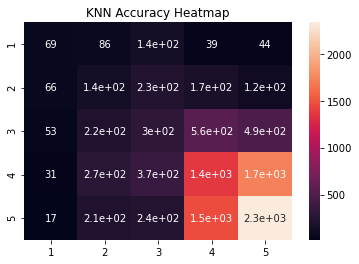

In [ ]:
# heatmap
x_labels = [1,2,3,4,5]
y_labels = [1,2,3,4,5]
sns.heatmap(KNN_cm, annot=True, xticklabels = x_labels, yticklabels = y_labels).set(title = "KNN Accuracy Heatmap")

In [ ]:
# accuracy score
print(accuracy_score(y_test,KNN_y_pred))

0.3916798217104652


### SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
## SVM
svm = SVC(kernel = "rbf", random_state = 8)
svm.fit(X_train, y_train)
SVM_y_pred = svm.predict(X_test)

In [ ]:
# accuracy score
print(accuracy_score(y_test, KNN_y_pred))

0.3916798217104652


In [ ]:
# confusion matrix
SVM_cm = confusion_matrix(y_test, SVM_y_pred)
SVM_cm

array([[  89,   30,   83,  151,   29],
       [  57,   22,   95,  418,  128],
       [  46,   23,   74,  812,  660],
       [  21,   23,   41, 1266, 2419],
       [  13,   12,   36, 1013, 3208]], dtype=int64)

[Text(0.5, 1.0, 'SVM Accuracy Heatmap')]

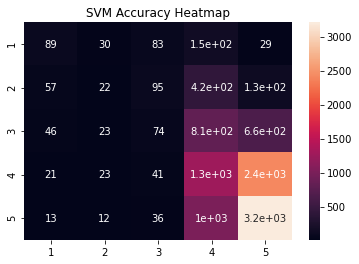

In [ ]:
# heatmap
x_labels = [1,2,3,4,5]
y_labels = [1,2,3,4,5]
sns.heatmap(SVM_cm, annot=True, xticklabels = x_labels, yticklabels = y_labels).set(title = "SVM Accuracy Heatmap")

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# decision tree
dtree = DecisionTreeClassifier(criterion = "gini")
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)

In [ ]:
# accuracy score
print(accuracy_score(y_test, dtree_y_pred))

0.4338378679543133


In [ ]:
# confusion matrix
dt_cm = confusion_matrix(y_test, dtree_y_pred)
dt_cm

array([[ 145,   45,   38,  122,   32],
       [ 103,   64,   70,  360,  123],
       [  89,   57,   77,  759,  633],
       [  62,   26,   54, 1322, 2306],
       [  40,   20,   60, 1098, 3064]], dtype=int64)

[Text(0.5, 1.0, 'Decision Tree Accuracy Heatmap')]

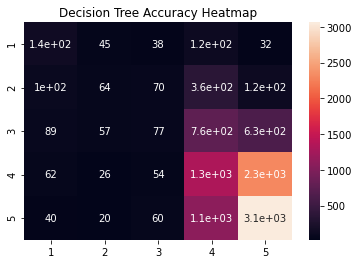

In [ ]:
# heatmap
x_labels = [1,2,3,4,5]
y_labels = [1,2,3,4,5]
sns.heatmap(dt_cm, annot=True, xticklabels = x_labels, yticklabels = y_labels).set(title = "Decision Tree Accuracy Heatmap")

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random forest
rf = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, rf_y_pred))

0.4307735165753552


In [ ]:
# confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[ 112,   30,   83,  123,   34],
       [  77,   36,  108,  360,  139],
       [  65,   29,  124,  700,  697],
       [  35,    9,  101, 1156, 2469],
       [  25,    8,   82,  956, 3211]], dtype=int64)

[Text(0.5, 1.0, 'Random Forest Accuracy Heatmap')]

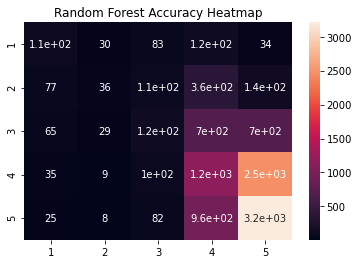

In [ ]:
#heatmap
x_labels = [1,2,3,4,5]
y_labels = [1,2,3,4,5]
sns.heatmap(rf_cm, annot=True, xticklabels = x_labels, yticklabels = y_labels).set(title = "Random Forest Accuracy Heatmap")

### Logistic Regression

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
lr_y_pred =  log_reg.predict(X_test)

In [ ]:
print(accuracy_score(y_test, lr_y_pred))

0.4285448973906584


### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
target = data_cleaned["Star"]
features = data_cleaned.drop("Star", axis = 1)
features = features[['positive_count','negative_count', 'total_count',
                     'positive_ratio', 'negative_ratio']]
features = StandardScaler().fit_transform(features)
features

array([[-0.68281378, -0.78001062, -0.86431845,  1.02280471, -1.03601134],
       [ 1.79828691,  0.58684362,  1.83443945,  0.16448977, -0.14521993],
       [ 1.79828691,  0.58684362,  1.08575178,  0.16448977, -0.14521993],
       ...,
       [ 0.14421979, -0.0965835 ,  0.51117751,  0.12547546, -0.10472941],
       [ 0.3096265 ,  0.92855717,  0.99869507, -0.62229892,  0.67133887],
       [-0.51740706, -0.43829706, -0.56832565,  0.20025289, -0.18233623]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.5, 0.5])

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
model1_nb = MultinomialNB()
y_train_pred = model1_nb.fit(X_train,y_train.Sentiment).predict(X_train)

y_pred = model1_nb.predict(X_test)

# comparing actual response values  with predicted response values
from sklearn import metrics
print("Multinomial Naive Bayes model train accuracy(in %):", metrics.accuracy_score(y_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


In [ ]:
# accuracy score
print(accuracy_score(y1_test, y_pred))